<a href="https://colab.research.google.com/github/hritik4/ChefALaCarte/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

**GOOGLE DRIVE MOUNTING**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**AUTHENTICATING COLAB TO READ FILES FROM THE DRIVE**  

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import warnings

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**IMPORTING CSV FROM GOOGLE DRIVE**

In [5]:
link = 'https://drive.google.com/file/d/1lm0BC1gJh8s32nwMM70sjTpogduutKCP/view?usp=sharing'
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('comments_1.csv')

df1 = pd.read_csv('comments_1.csv')

In [6]:
df1.head(1)

,hotel_url,author,date,rating,title,text,service,location,value,cleanliness,sleep quality,rooms,check in / front desk,"business service (e.g., internet access)",ur_question.prompt.11,userrating.prompt.190
0,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,violettaf340,2019-01-01T00:00:00,5.0,Xmas holiday,We went here with our kids for Xmas holiday an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(df1.shape)

(1001000, 16)


**CALCULATING NULL VALUES PRESENT IN THE DATASET**

In [8]:
df1.isnull().sum()

hotel_url                                         0
author                                          435
date                                              0
rating                                            0
title                                            30
text                                              0
service                                      288423
location                                     485082
value                                        468699
cleanliness                                  468414
sleep quality                                543244
rooms                                        486448
check in / front desk                        980817
business service (e.g., internet access)     988381
ur_question.prompt.11                       1000995
userrating.prompt.190                       1000995
dtype: int64

Since 30 rows of titles are empty, we filled all of them with the text "Average hotel with good amenities".

In [9]:
column_name = 'title'
replacement_text = "Average hotel with good amenities"

# Identify and fill missing values automatically for the specified column
missing_indices = df1.index[df1[column_name].isnull()]
if missing_indices.any():
    print(f"Column '{column_name}':")
    for index in missing_indices:
        print(f"Row {index}:")
        print(df1.iloc[index])  # Display the entire row
        df1.at[index, column_name] = replacement_text

Column 'title':
Row 80133:
hotel_url                                   Hotel_Review-g60545-d141988-Reviews-Baymont_by...
author                                                                                VinceGT
date                                                                      2017-10-01T00:00:00
rating                                                                                    5.0
title                                                                                     NaN
text                                        I found the staff courteous, friendly and help...
service                                                                                   5.0
location                                                                                  3.0
value                                                                                     5.0
cleanliness                                                                               5.0
sleep quality                    

**CHECKING NULL VALUES AFTER DATA IMPUTATION**

In [10]:
df1.isnull().sum()

hotel_url                                         0
author                                          435
date                                              0
rating                                            0
title                                             0
text                                              0
service                                      288423
location                                     485082
value                                        468699
cleanliness                                  468414
sleep quality                                543244
rooms                                        486448
check in / front desk                        980817
business service (e.g., internet access)     988381
ur_question.prompt.11                       1000995
userrating.prompt.190                       1000995
dtype: int64

**WORDCLOUD FOR THE COLUMN "TITLE"**

Wordcloud is basically a visualization technique to represent the frequency of words in a text where the size of the word represents its frequency

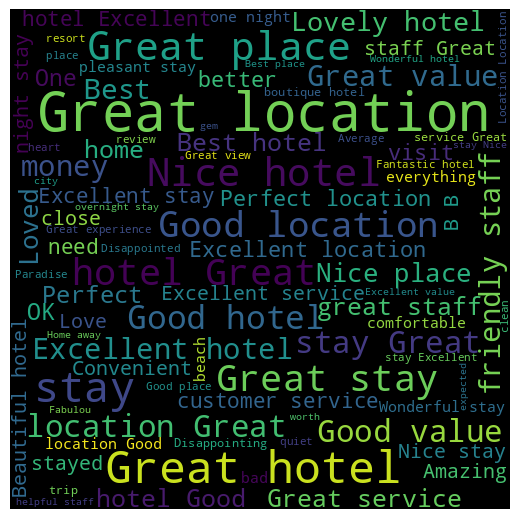

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = df1['title']

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='black',
                stopwords = None,
                min_font_size = 10).generate(data.to_string())

plt.figure(figsize = (5,8 ), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

**WORDCLOUD FOR THE COLUMN "TEXT"**

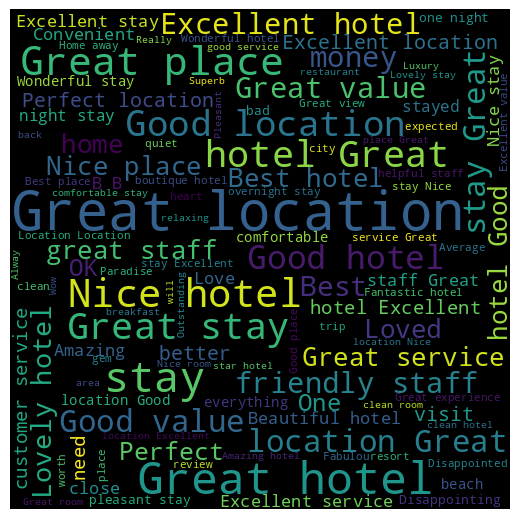

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data1 = df1['text']

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='black',
                stopwords = None,
                min_font_size = 10).generate(data.to_string())

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

**GRAPH PLOTTING TO BE ABLE TO VISUALIZE HOW DATA IS DISTRIBUTED BETWEEN THE YEARS**

In [13]:
from matplotlib.ticker import MaxNLocator

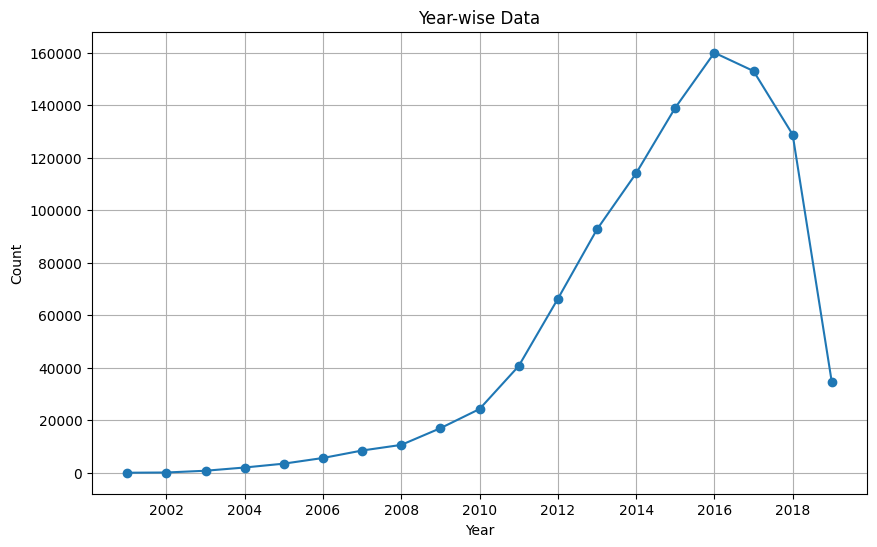

In [14]:
df1['date'] = pd.to_datetime(df1['date'])
df1['year'] = df1['date'].dt.year
yearly_data = df1.groupby('year').size()
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data.values, marker='o')
plt.title('Year-wise Data')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

**PRE-PROCESSING THE DATA**

IMPORTING NECESSARY LIBRARIES

In [15]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [16]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [17]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

**PERFORMING TOKENIZATION, SPECIAL CHARACTERS REMOVAL, STEMMING AND LEMMETIZATION ON THE COLUMN "TITLE**

In [18]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

CREATED A FUNCTION TO PERFORM THE TEXT PROCESSING THAT INCLUDES TOKENIZATION, REMOVE SPECIAL CHARACTERS, LEMMETIZATION AND SPECIAL CHARACTERS REMOVAL

In [19]:
def preprocess_text(text):
    if isinstance(text, str):
        # Remove special characters
        pattern = r'[^\w\s]'
        text = re.sub(pattern, '', text)

        # Tokenize the text
        tokens = word_tokenize(text.lower())
        # Remove stop words
        filtered_tokens = [token for token in tokens if token not in stop_words]
        # Lemmatize the tokens
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
        # Join the tokens back into a string
        preprocessed_text = ' '.join(lemmatized_tokens)
        return preprocessed_text
    else:
        return str(text)

# Apply the preprocess_text function to the 'title' column
df1['title'] = df1['title'].apply(preprocess_text)


In [20]:
df1.head(2)

,hotel_url,author,date,rating,title,text,service,location,value,cleanliness,sleep quality,rooms,check in / front desk,"business service (e.g., internet access)",ur_question.prompt.11,userrating.prompt.190,year
0,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,violettaf340,2019-01-01,5.0,xmas holiday,We went here with our kids for Xmas holiday an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,Lagaiuzza,2016-01-01,5.0,baltic else,We have spent in this hotel our summer holiday...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016


**PERFORMING TOKENIZATION, SPECIAL CHARACTERS REMOVAL, STEMMING AND LEMMETIZATION ON THE COLUMN "TEXT**

In [ ]:
def preprocess_text(text):
    if isinstance(text, str):
        # Remove special characters
        pattern = r'[^\w\s]'
        text = re.sub(pattern, '', text)

        # Tokenize the text
        tokens = word_tokenize(text.lower())
        # Remove stop words
        filtered_tokens = [token for token in tokens if token not in stop_words]
        # Lemmatize the tokens
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
        # Join the tokens back into a string
        preprocessed_text = ' '.join(lemmatized_tokens)
        return preprocessed_text
    else:
        return str(text)

# Apply the preprocess_text function to the 'title' column
df1['text'] = df1['text'].apply(preprocess_text)

In [21]:
df1.head(3)

,hotel_url,author,date,rating,title,text,service,location,value,cleanliness,sleep quality,rooms,check in / front desk,"business service (e.g., internet access)",ur_question.prompt.11,userrating.prompt.190,year
0,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,violettaf340,2019-01-01,5.0,xmas holiday,We went here with our kids for Xmas holiday an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,Lagaiuzza,2016-01-01,5.0,baltic else,We have spent in this hotel our summer holiday...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
2,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,ashleyn763,2014-10-01,5.0,excellent every way,I visited Hotel Baltic with my husband for som...,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014


In [22]:
def handle_negation(text):
    words = word_tokenize(text)
    negated_words = []
    negation = False
    for word in words:
        if word in ['not', 'no', 'nobody', 'none', 'never', 'neither', 'nowhere']:
            negation = not negation
        elif negation:
            word = 'not_' + word
        negated_words.append(word)
    negated_text = ' '.join(negated_words)
    return negated_text

In [23]:
def handle_intensifiers(text):
    words = word_tokenize(text)
    for i in range(len(words)):
        if words[i] in ['very', 'extremely', 'highly', 'really', 'absolutely', 'totally']:
            words[i] = words[i] + '_intensifier'
    intensified_text = ' '.join(words)
    return intensified_text

In [ ]:
df1['title_handle_negation'] = df1['title'].apply(handle_negation)
df1['text_handle_negation'] = df1['text'].apply(handle_negation)

In [ ]:
df1['title_intensifier'] = df1['title'].apply(handle_intensifiers)
df1['text_intensifier'] = df1['text'].apply(handle_intensifiers)

In [ ]:
df1.head(3)

,hotel_url,author,date,rating,title,text,service,location,value,cleanliness,...,rooms,check in / front desk,"business service (e.g., internet access)",ur_question.prompt.11,userrating.prompt.190,year,title_handle_negation,text_handle_negation,title_intensifier,text_intensifier
0,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,violettaf340,2019-01-01,5.0,xmas holiday,went kid xmas holiday really liked large optio...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2019,xmas holiday,went kid xmas holiday really liked large optio...,xmas holiday,went kid xmas holiday really_intensifier liked...
1,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,Lagaiuzza,2016-01-01,5.0,baltic else,spent hotel summer holiday summer 2014 2015 hu...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2016,baltic else,spent hotel summer holiday summer 2014 2015 hu...,baltic else,spent hotel summer holiday summer 2014 2015 hu...
2,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,ashleyn763,2014-10-01,5.0,excellent every way,visited hotel baltic husband bike riding area ...,5.0,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2014,excellent every way,visited hotel baltic husband bike riding area ...,excellent every way,visited hotel baltic husband bike riding area ...


**PERFORMING SENTIMENT ANALYSIS WITH THE HELP OF THE LIBRARY TEXT BLOB**

ON THE COLUMN "TTITLE"

In [ ]:
from textblob import TextBlob

In [ ]:
df1['sentiment_title'] = df1['title'].apply(lambda text: TextBlob(text).sentiment.polarity)
df1['sentiment_title'] = df1['sentiment_title'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

In [ ]:
positive_count = (df1['sentiment_title'] == 'positive').sum()
negative_count = (df1['sentiment_title'] == 'negative').sum()

print("Positive Count:", positive_count)
print("Negative Count:", negative_count)

Positive Count: 661853
Negative Count: 65149


ON THE COLUMN "TEXT"

In [ ]:
df1['sentiment_text'] = df1['text'].apply(lambda text: TextBlob(text).sentiment.polarity)
df1['sentiment_text'] = df1['sentiment_text'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')


In [ ]:
positive_count2 = (df1['sentiment_text'] == 'positive').sum()
negative_count2 = (df1['sentiment_text'] == 'negative').sum()

print("Positive Count:", positive_count2)
print("Negative Count:", negative_count2)

Positive Count: 949739
Negative Count: 48895


In [ ]:
df1.head(4)

,hotel_url,author,date,rating,title,text,service,location,value,cleanliness,...,"business service (e.g., internet access)",ur_question.prompt.11,userrating.prompt.190,year,title_handle_negation,text_handle_negation,title_intensifier,text_intensifier,sentiment_title,sentiment_text
0,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,violettaf340,2019-01-01,5.0,xmas holiday,went kid xmas holiday really liked large optio...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2019,xmas holiday,went kid xmas holiday really liked large optio...,xmas holiday,went kid xmas holiday really_intensifier liked...,neutral,positive
1,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,Lagaiuzza,2016-01-01,5.0,baltic else,spent hotel summer holiday summer 2014 2015 hu...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2016,baltic else,spent hotel summer holiday summer 2014 2015 hu...,baltic else,spent hotel summer holiday summer 2014 2015 hu...,neutral,positive
2,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,ashleyn763,2014-10-01,5.0,excellent every way,visited hotel baltic husband bike riding area ...,5.0,5.0,5.0,NaN,...,NaN,NaN,NaN,2014,excellent every way,visited hotel baltic husband bike riding area ...,excellent every way,visited hotel baltic husband bike riding area ...,positive,positive
3,Hotel_Review-g194775-d1121769-Reviews-Hotel_Ba...,DavideMauro,2014-08-01,5.0,house family holiday,ive travelled quite number hotel best place ac...,5.0,NaN,NaN,5.0,...,NaN,NaN,NaN,2014,house family holiday,ive travelled quite number hotel best place ac...,house family holiday,ive travelled quite number hotel best place ac...,neutral,positive


**COUNTING FREQUENTLY OCCURING WORDS**

In [ ]:
from collections import Counter
cnt = Counter()
for text in df1["title"].values:
    for word in str(text).split():
        cnt[word] += 1
cnt.most_common(20)
text1 = pd.DataFrame(cnt.most_common(20))
text1.columns=['Word', 'Frequency']
text1

,Word,Frequency
0,hotel,167338
1,great,161004
2,stay,114561
3,location,84823
4,good,80689
5,place,57946
6,nice,57795
7,excellent,51056
8,staff,42131
9,service,38907


from matplotlib import pyplot as plt
text1['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
text1['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from collections import Counter
cnt = Counter()
for text in df1["text"].values:
    for word in str(text).split():
        cnt[word] += 1
cnt.most_common(20)
text1 = pd.DataFrame(cnt.most_common(20))
text1.columns=['Word', 'Frequency']
text1

,Word,Frequency
0,room,1397631
1,hotel,1329210
2,staff,672273
3,good,581676
4,stay,538456
5,great,533953
6,breakfast,486570
7,would,441004
8,clean,400232
9,night,397012


from matplotlib import pyplot as plt
text1['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
text1['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

Manually extracting aspects

In [ ]:
import pandas as pd

aspects = ['service', 'location', 'value', 'cleanliness', 'sleep', 'quality', 'rooms', 'check in / front desk', 'business service (e.g., internet access)']

# Define a function to extract aspects from both 'text' and 'title' columns
def extract_aspects_from_text_and_title(row):
    text = row['text'] + ' ' + row['title']  # Combine 'text' and 'title' with a space
    extracted_aspects = [aspect for aspect in aspects if aspect in text]
    return extracted_aspects

# Apply the function to create a new 'aspects' column in the DataFrame
df1['aspects'] = df1.apply(extract_aspects_from_text_and_title, axis=1)

In [ ]:
import tensorflow as tf

# Check if a GPU is available
if tf.test.gpu_device_name():
    print("GPU is available")
    print("GPU device name: {}".format(tf.test.gpu_device_name()))
else:
    print("No GPU detected")

# Check GPU memory usage
!nvidia-smi

GPU is available
GPU device name: /device:GPU:0
Thu Nov  2 09:16:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    27W /  70W |    359MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                        

In [ ]:
df1['aspects'].head()

0             [quality]
1                    []
2                    []
3    [service, quality]
4             [service]
Name: aspects, dtype: object

**SAVING THE PROCESSED CSV FILE IN ORDER TO SAVE RAM AND DIRECTLY WORK ON THE PROCESSED DATA**

In [ ]:
df1.to_csv('processed_data_Major.csv', index=False)

READING THE PROCESSED CSV FILE

In [ ]:
df = pd.read_csv('processed_data_Major.csv')

In [ ]:
link = 'https://drive.google.com/file/d/1H7lTmbAj_mNUHn1TW5l7qm9QsULsMO_4/view?usp=sharing'
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('processed_data_Major.csv')

df3 = pd.read_csv('processed_data_Major.csv')

<ipython-input-82-2ae31f42a26c>:7: DtypeWarning: Columns (12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('processed_data_Major.csv')


In [ ]:
df3.shape

(1002852, 24)

In [ ]:
df3.tail(2)

,hotel_url,author,date,rating,title,text,service,location,value,cleanliness,...,ur_question.prompt.11,userrating.prompt.190,year,title_handle_negation,text_handle_negation,title_intensifier,text_intensifier,sentiment_title,sentiment_text,aspects
1002850,Hotel_Review-g293734-d3332159-Reviews-The_Capa...,rosannafalconer,2015-09-01 00:00:00,5.0,idyllic cool unique,magical unique place tara ed charming cool cha...,5.0,NaN,5.0,5.0,...,NaN,NaN,2015,idyllic cool unique,magical unique place tara ed charming cool cha...,idyllic cool unique,magical unique place tara ed charming cool cha...,positive,positive,[]
1002851,Hotel_Review-g293734-d3332159-Reviews-The_Capa...,amandacF2655FM,2015-09-01 00:00:00,5.0,beautiful relaxing getaway,stayed hotel several occasion previously frien...,5.0,NaN,NaN,4.0,...,NaN,NaN,2015,beautiful relaxing getaway,stayed hotel several occasion previously frien...,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3.isnull().sum()

hotel_url                                         0
author                                          436
date                                              1
rating                                            0
title                                             0
text                                              0
service                                      288951
location                                     486022
value                                        469617
cleanliness                                  469326
sleep quality                                544355
rooms                                        487394
check in / front desk                        982625
business service (e.g., internet access)     990198
ur_question.prompt.11                       1002846
userrating.prompt.190                       1002846
year                                              0
title_handle_negation                          1131
text_handle_negation                              0
title_intens

CHECKING WHETHER THE NULL VALUES IN df1 is equal to df or not

In [ ]:
missing_values_df1 = df1.isna()

In [ ]:
missing_values_df = df.isna()

In [ ]:
are_equal = missing_values_df1.equals(missing_values_df)

In [ ]:
are_equal

False

In [ ]:
df3['title'].fillna("Not available", inplace=True)

In [ ]:
df3['text'].fillna("Not available", inplace=True)

Hence, here we got to knew becauze of preprocessing some of the textual data present in the Dataset got nullified.

**BAG OF WORDS**

IMPLEMENTING BoW on "TITLE"

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer(max_features=1000)

vectorizer.fit(df3['title'])

batch_size = 1000
n_samples = len(df3)
X = np.zeros((n_samples, 1000), dtype=np.int32)

for i in range(0, n_samples, batch_size):
    batch = df['title'][i:i+batch_size]

    batch_transformed = vectorizer.transform(batch).toarray()
    X[i:i+batch_size] = batch_transformed

ValueError: ignored

IMPLEMENTING BoW on "TEXT"

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

batch_size = 1000
vectorizer = CountVectorizer(max_features=1000)

for i in range(0, len(df), batch_size):
    batch = df['text'][i:i+batch_size]
    Y_batch = vectorizer.fit_transform(batch)


In [ ]:
batch_transformed

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
Y_batch

<108x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 4281 stored elements in Compressed Sparse Row format>

**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features= 500)
Y1 = vectorizer.fit_transform(df['title'])
Y1

<1001000x500 sparse matrix of type '<class 'numpy.float64'>'
	with 2395548 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features= 500)
Y2 = vectorizer.fit_transform(df['text'])
Y2

<1001000x500 sparse matrix of type '<class 'numpy.float64'>'
	with 32523530 stored elements in Compressed Sparse Row format>

**POS TAGGING**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

CONVERTING INTO STRING TYPE

In [ ]:
df3['title'] = df3['title'].astype(str)
df['text'] = df['text'].astype(str)

APPLYING POS TAGGING ON THE TEXTUAL DATA

In [ ]:
df['title_pos'] = df['title'].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))
df['text_pos'] = df['text'].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))

**SPLITTING INTO TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
max_rows = 1000

THIS IN DONE IN ORDER TO MAINTAIN THE SHAPE OF FEATURE AND PREDICTOR COLUMN

In [ ]:
df2 = df['rating'].iloc[:max_rows]

In [ ]:
df2.shape

(1000,)

**APPLYING LINEAR REGRESSION ON BAG OF WORDS**

BAG OF WORDS

In [ ]:
import random

In [ ]:
Y_batch.shape

(108, 1000)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Y_batch, df2, test_size=0.35, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)


score = model.score(X_test, Y_test)


In [ ]:
print("Model Score:", score)

Model Score: -3.9692442124179896


APPLYING RANDOM FOREST REGRESSOR WITH THE HELP OF BAG OF WORDS

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)


In [ ]:
clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3657142857142857


APPLYING TUNING TECHNIQUE SUCH AS GRID SEARCH TO FIND THE BEST PARAMETERS FOR THE SPLIT

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

In [ ]:
accuracy1 = accuracy_score(Y_test, y_pred)

In [ ]:
print("accuracy", accuracy1)

accuracy 0.33714285714285713


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
num_folds = 5
scoring_metric = 'accuracy'

In [ ]:
cross_val_scores = cross_val_score(clf, Y_batch, df2, cv=num_folds, scoring=scoring_metric)

In [ ]:
print("Cross-Validation Scores:", cross_val_scores)

Cross-Validation Scores: [0.375 0.375 0.39  0.38  0.4  ]


BOOSTING TO TRY INCREASE THE ACCURACY OF THE MODEL

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

In [ ]:
regressor.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=0)

In [ ]:
y_pred2 = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(Y_test, y_pred2)  # Mean Squared Error
r2 = r2_score(Y_test, y_pred2)  # R-squared

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.2790802689206222
R-squared: -0.17841921830552798


TF-IDF

In [ ]:
XV_train, XV_test, YV_train, YV_test = train_test_split(Y1, YW, test_size=0.35, random_state=42)

In [ ]:
reg = RandomForestRegressor(random_state=42)
reg.fit(XV_train, YV_train)

In [ ]:
y_pred2 = reg.predict(XV_test)
mse = mean_squared_error(YV_test, y_pred2)
r2 = r2_score(YV_test, y_pred2)
print("Mean squared error: %.2f" % mse)
print("R2 score: %.2f" % r2)

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
!git clone repository_url